In [2]:
import os

output_files = os.listdir('images/img_resized')
num_output_files = len(output_files)
print(num_output_files)

122137


In [1]:
import pandas as pd
import seaborn as sns

In [9]:
wER = pd.read_csv('post_wER.csv', index_col = 0)
wER

,json,post_timestamp,likes,comments,json_file,Username,Sponsor,#Followers,#Posts,ER
0,1778527492682732179.json,1526237020,172,11,1778527492682732179.json,layersnlipstick,0,3105.0,1652.0,0.058937
1,1944636038815427244.json,1546038702,259,6,1944636038815427244.json,madison_silotti,0,4937.0,805.0,0.053676
2,1919337317395337083.json,1543022859,3191,39,1919337317395337083.json,mrs.rebeccarobinson,0,83376.0,1468.0,0.038740
3,1973686443494832201.json,1549501780,3217,69,1973686443494832201.json,thehouseofsequins,0,225990.0,2451.0,0.014540
4,1687821871570856682.json,1515424067,1268,88,1687821871570856682.json,scoynex,0,34957.0,799.0,0.038791
...,...,...,...,...,...,...,...,...,...,...
425606,1938593043369662682.json,1545318321,11094,18,1938593043369662682.json,jeromelamaar,0,232436.0,977.0,0.047807
425607,2002986686942145187.json,1552994641,547,20,2002986686942145187.json,mrscocowyse,0,110414.0,4267.0,0.005135
425608,1867448645486726111.json,1536837248,451,80,1867448645486726111.json,jennaleeannllc,0,9110.0,561.0,0.058288
425609,1459428168212777165.json,1488197416,187,29,1459428168212777165.json,laura.lehman,0,11388.0,810.0,0.018967


In [6]:
sponsored = pd.read_csv('sponsored_image.csv', index_col = 0)
sponsored

,json_file,image_files
0,1309041812857818435.json,['1309041812857818435.jpg']
1,1476490497539529413.json,['1476490497539529413.jpg']
2,1606115486206804899.json,['1606115486206804899.jpg']
3,1606130952468007792.json,['1606130909971240023.jpg']
4,1651957573904970960.json,['1651957573904970960.jpg']
...,...,...
88686,1883076195117984662.json,['1883076195117984662.jpg']
88687,1884326074935014613.json,['1884326074935014613.jpg']
88688,1890259046011829896.json,['1890259046011829896.jpg']
88689,1989242405811088071.json,['1989242405811088071.jpg']


In [29]:
def get_first_image(image_files_string):
  try:
    image_files_list = eval(image_files_string)
    return image_files_list[0] if image_files_list else None
  except (SyntaxError, IndexError):
    return None

combined = sponsored.merge(wER, how='inner', on='json_file').drop(columns = ['json', 'post_timestamp', 'likes', 'comments',
                                                                          'Username', 'Sponsor', '#Followers', '#Posts']) 
combined['image_file'] = combined['image_files'].apply(get_first_image)
combined.drop('image_files', axis=1, inplace=True)
combined = combined[combined['image_file'].notna()]
combined

,json_file,ER,image_file
0,1463900805630764249.json,0.048123,1463900805630764249.jpg
1,1473156733143990977.json,0.034806,1473156733143990977.jpg
2,1480307586229523707.json,0.040557,1480307586229523707.jpg
3,1490802434455763888.json,0.106840,1490802434455763888.jpg
4,1494215141078983299.json,0.102906,1494215141078983299.jpg
...,...,...,...
57326,1883076195117984662.json,0.012103,1883076195117984662.jpg
57327,1884326074935014613.json,0.015018,1884326074935014613.jpg
57328,1890259046011829896.json,0.012914,1890259046011829896.jpg
57329,1989242405811088071.json,0.018390,1989242405811088071.jpg


<Axes: xlabel='ER'>

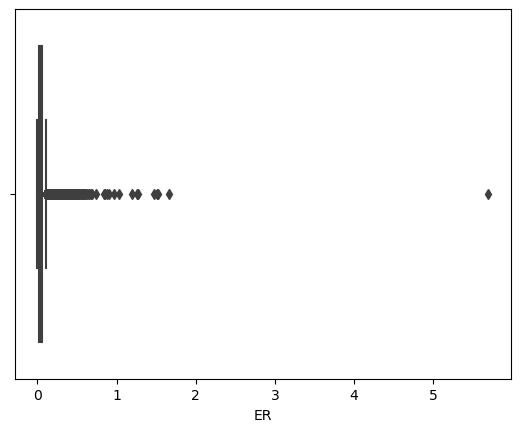

In [32]:
sns.boxplot(x=combined["ER"])

In [34]:
df_filtered = combined.sort_values(by='ER', ascending=False).iloc[1:]  # Sort descending, remove last row

df_filtered

,json_file,ER,image_file
37137,1973691269452645660.json,1.667481,1973691269452645660.jpg
37134,1964991022997339870.json,1.523519,1964991022997339870.jpg
37135,1965715620176466700.json,1.512930,1965715616124693168.jpg
19685,1972047318845521067.json,1.465816,1972047313200055132.jpg
53981,1862354468589268257.json,1.268122,1862349659926824549.jpg
...,...,...,...
9328,2023494287911834906.json,0.000123,2023494283021291811.jpg
9332,2024180482329329088.json,0.000116,2024180478093280082.jpg
9331,2024141550581669071.json,0.000113,2024141550581669071.jpg
12961,2019606855207921783.json,0.000102,2019606850904621965.jpg


In [ ]:
df_filtered.to_csv('image_er.csv', index = False)

In [8]:
df = pd.read_csv('post_time_features.csv')
df.head()

,post_timestamp,likes,comments,sponsor,ER_x,#Followers,json,year,month,day,hour,weekday,season,hour_category,working_hour_status,json_file,ER_y,image_file,post_text,weight
0,2019-01-30 13:32:07,13943,191,1,0.009595,1473064.0,1968412919332625543.json,2019,1,30,13,3,Winter,12-15,working_hour,1968412919332625543.json,0.009595,1968412525487470753.jpg,Sunshine state of mind charlotterusse CRbabe s...,0.000019
1,2018-12-27 14:07:40,323,1,1,0.038539,8407.0,1943788437506894654.json,2018,12,27,14,4,Winter,12-15,working_hour,1943788437506894654.json,0.038539,1943788433639898270.jpg,here we are wrapping up 2018 4 days left in th...,0.000019
2,2017-11-28 11:42:31,757,42,1,0.151068,5289.0,1658153747808747705.json,2017,11,28,11,2,Fall,9-12,working_hour,1658153747808747705.json,0.151068,1658153747808747705.jpg,Comfy cozy I love wearing super laidback outf...,0.000269
3,2018-07-14 07:47:20,1183,46,1,0.063844,19250.0,1823254037384713661.json,2018,7,14,7,6,Summer,6-9,non_working_hour,1823254037384713661.json,0.063844,1823254037384713661.jpg,Jumpsuit from nakdfashion discount codeJulia...,0.000019
4,2017-11-05 06:48:32,3783,155,1,0.018165,216786.0,1641335939132641650.json,2017,11,5,6,7,Fall,6-9,non_working_hour,1641335939132641650.json,0.018165,1641334709757030974.jpg,Check out my new love my laimer_woodwatch so c...,0.000019


In [9]:
df = pd.read_csv('post_time_features.csv')
df.drop(columns=['post_timestamp', 'likes', 'comments', '#Followers', 'sponsor', 'ER_x', 'json'], inplace=True)
df.columns = ['year', 'month', 'day', 'hour', 'weekday', 'season',
              'hour_category', 'working_hour', 'json_file', 'ER', 'image_file', 'post_text', 'weight']

df['season'] = df['season'].apply(lambda x: 0 if x == 'Spring' else (1 if x == 'Summer' else (2 if x == 'Fall' else 3)))

df['hour_category'] = df['hour_category'].apply(lambda x: 0 if x == '0-3' else (1 if x == '3-6'
                                                    else (3 if x == '6-9' else (4 if x == '9-12'
                                                    else (5 if x == '12-15' else (6 if x == '15-18'
                                                    else (7 if x == '18-21' else 8)))))))

df['working_hour'] = df['working_hour'].apply(lambda x: 1 if x=='working_hour' else 0)

,year,month,day,hour,weekday,season,hour_category,working_hour,json_file,ER,image_file,post_text,weight
0,2019,1,30,13,3,3,5,1,1968412919332625543.json,0.009595,1968412525487470753.jpg,Sunshine state of mind charlotterusse CRbabe s...,0.000019
1,2018,12,27,14,4,3,5,1,1943788437506894654.json,0.038539,1943788433639898270.jpg,here we are wrapping up 2018 4 days left in th...,0.000019
2,2017,11,28,11,2,2,4,1,1658153747808747705.json,0.151068,1658153747808747705.jpg,Comfy cozy I love wearing super laidback outf...,0.000269
3,2018,7,14,7,6,1,3,0,1823254037384713661.json,0.063844,1823254037384713661.jpg,Jumpsuit from nakdfashion discount codeJulia...,0.000019
4,2017,11,5,6,7,2,3,0,1641335939132641650.json,0.018165,1641334709757030974.jpg,Check out my new love my laimer_woodwatch so c...,0.000019


In [10]:
df.to_csv('data_w_time_feature.csv', lineterminator = "\r\n", index = False)

In [11]:
tmp = pd.read_csv('data_w_time_feature.csv')
tmp.head()

,year,month,day,hour,weekday,season,hour_category,working_hour,json_file,ER,image_file,post_text,weight
0,2019,1,30,13,3,3,5,1,1968412919332625543.json,0.009595,1968412525487470753.jpg,Sunshine state of mind charlotterusse CRbabe s...,0.000019
1,2018,12,27,14,4,3,5,1,1943788437506894654.json,0.038539,1943788433639898270.jpg,here we are wrapping up 2018 4 days left in th...,0.000019
2,2017,11,28,11,2,2,4,1,1658153747808747705.json,0.151068,1658153747808747705.jpg,Comfy cozy I love wearing super laidback outf...,0.000269
3,2018,7,14,7,6,1,3,0,1823254037384713661.json,0.063844,1823254037384713661.jpg,Jumpsuit from nakdfashion discount codeJulia...,0.000019
4,2017,11,5,6,7,2,3,0,1641335939132641650.json,0.018165,1641334709757030974.jpg,Check out my new love my laimer_woodwatch so c...,0.000019
